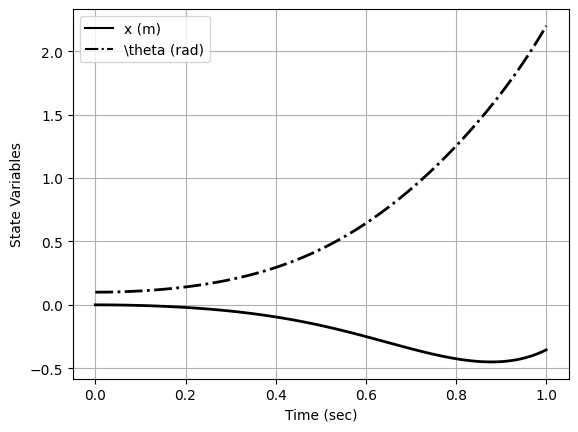

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# تابع برای مدل پاندول وارونه
def inverted_pendulum(t, x):
    g = 9.8
    l = 1.0
    m = 1.0
    M = 1.0
    
    d1 = M + m * (1 - np.cos(x[1])**2)
    d2 = l * d1

    F = 0  # بدون ورودی

    dxdt = [
        x[2],
        x[3],
        (F + m * l * x[3]**2 * np.sin(x[1]) - m * g * np.sin(x[1]) * np.cos(x[1])) / d1,
        (-F * np.cos(x[1]) - m * l * x[3]**2 * np.sin(x[1]) * np.cos(x[1]) + (M + m) * g * np.sin(x[1])) / d2
    ]

    return dxdt

# پارامترهای شبیه‌سازی
tspan = (0, 1)
y0 = [0, 0.1, 0, 0]

# حل معادلات دیفرانسیل
sol = solve_ivp(inverted_pendulum, tspan, y0, max_step=1e-2)

# رسم نتایج شبیه‌سازی
plt.plot(sol.t, sol.y[0], 'k', label='x (m)')
plt.plot(sol.t, sol.y[1], '-.k', label='\\theta (rad)')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_linewidth(2)
plt.show()
